<a href="https://colab.research.google.com/github/Martipetti/MachineLearning/blob/develop-martipetti/Modelli/Rete%20Neurale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Download the data

In [14]:
link = 'http://tennis-data.co.uk/2023/2023.xlsx'
totalData = pd.read_excel(link)

Removing null value

In [15]:
for column in totalData:
  totalData.dropna(subset=[column], inplace=True)

Cleaning DataSet

In [16]:
totalData = totalData[totalData['Series'] == 'Grand Slam']

In [17]:
trainingSet = totalData[["Tournament", "Surface", "Round", "Winner", "Loser", "WRank", "LRank", "Wsets", "Lsets", "B365W", "B365L", "PSW", "PSL"]]

In [18]:
trainingSet.reset_index(drop=True, inplace=True)
trainingSet.index = range(1, len(trainingSet) + 1)

In [19]:
nuovi_nomi_colonne = ["Tournament","Surface", "Round", "Player1", "Player2", "Rank1", "Rank2", "Sets1", "Sets2", "B1", "B2", "PS1", "PS2"]
trainingSet.columns = nuovi_nomi_colonne

In [20]:
trainingSet["target"] = 0

<ipython-input-20-60ba1f42b5c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["target"] = 0


Mapping string to integer

In [21]:
trainingSet["Tournament"] = trainingSet["Tournament"].astype("category")
trainingSet["Surface"] = trainingSet["Surface"].astype("category")
trainingSet["Round"] = trainingSet["Round"].astype("category")
trainingSet["Player1"] = trainingSet["Player1"].astype("category")
trainingSet["Player2"] = trainingSet["Player2"].astype("category")

<ipython-input-21-1d9e29e86b61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Tournament"] = trainingSet["Tournament"].astype("category")
<ipython-input-21-1d9e29e86b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Surface"] = trainingSet["Surface"].astype("category")
<ipython-input-21-1d9e29e86b61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [22]:
trainingSet.dtypes

Tournament    category
Surface       category
Round         category
Player1       category
Player2       category
Rank1          float64
Rank2          float64
Sets1          float64
Sets2          float64
B1             float64
B2             float64
PS1            float64
PS2            float64
target           int64
dtype: object

In [23]:
label_encoder = LabelEncoder()
trainingSet["Tournament"] = label_encoder.fit_transform(trainingSet["Tournament"])
trainingSet["Surface"] = label_encoder.fit_transform(trainingSet["Surface"])
trainingSet["Round"] = label_encoder.fit_transform(trainingSet["Round"])

<ipython-input-23-be19e985f5d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Tournament"] = label_encoder.fit_transform(trainingSet["Tournament"])
<ipython-input-23-be19e985f5d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Surface"] = label_encoder.fit_transform(trainingSet["Surface"])
<ipython-input-23-be19e985f5d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [24]:
label_encoder = LabelEncoder()
label_encoder.fit(trainingSet["Player2"].append(trainingSet["Player1"]))
tmp_1 = label_encoder.transform(trainingSet["Player1"])
tmp_2 = label_encoder.transform(trainingSet["Player2"])
trainingSet["Player1Code"], trainingSet["Player2Code"] = tmp_1, tmp_2

<ipython-input-24-98cfb96ab1d4>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label_encoder.fit(trainingSet["Player2"].append(trainingSet["Player1"]))
<ipython-input-24-98cfb96ab1d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Player1Code"], trainingSet["Player2Code"] = tmp_1, tmp_2
<ipython-input-24-98cfb96ab1d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Player1Code"], training

Mixing the player to avoid the pattern with the winner on the first columns and the loser on the second one

In [25]:
trainingSet

,Tournament,Surface,Round,Player1,Player2,Rank1,Rank2,Sets1,Sets2,B1,B2,PS1,PS2,target,Player1Code,Player2Code
1,0,2,0,Moutet C.,Wu Y.,62.0,114.0,3.0,2.0,2.38,1.57,2.40,1.65,0,64,106
2,0,2,0,Mcdonald M.,Nakashima B.,65.0,49.0,3.0,2.0,2.50,1.53,2.59,1.56,0,57,68
3,0,2,0,Millman J.,Huesler M.A.,140.0,51.0,3.0,2.0,2.20,1.67,2.25,1.72,0,59,41
4,0,2,0,Eubanks C.,Kwon S.W.,116.0,52.0,3.0,2.0,2.38,1.57,2.65,1.55,0,27,51
5,0,2,0,Fucsovics M.,Coria F.,78.0,76.0,3.0,2.0,1.14,5.50,1.17,5.96,0,31,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2,2,1,Mmoh M.,Isner J.,89.0,157.0,3.0,2.0,1.80,2.00,1.83,2.09,0,60,44
97,2,2,1,Arnaldi M.,Fils A.,61.0,48.0,3.0,2.0,2.30,1.62,2.54,1.58,0,2,28
98,2,2,2,Stricker D.,Bonzi B.,128.0,108.0,3.0,2.0,1.67,2.20,1.66,2.38,0,90,8
99,2,2,2,Djokovic N.,Djere L.,2.0,38.0,3.0,2.0,1.01,26.00,1.02,30.68,0,24,23


In [26]:
swap_rows = trainingSet.index[::2]

df_swapped = trainingSet.loc[swap_rows]
df_swapped['Player1Code'], df_swapped['Player2Code'] = df_swapped['Player2Code'], df_swapped['Player1Code']
df_swapped['target'] = 1
df_swapped['Rank1'], df_swapped['Rank2'] = df_swapped['Rank2'], df_swapped['Rank1']
df_swapped['Sets1'], df_swapped['Sets2'] = df_swapped['Sets2'], df_swapped['Sets1']
df_swapped['B1'], df_swapped['B2'] = df_swapped['B2'], df_swapped['B1']
df_swapped['PS1'], df_swapped['PS2'] = df_swapped['PS2'], df_swapped['PS1']

trainingSet = pd.concat([trainingSet.loc[~trainingSet.index.isin(swap_rows)], df_swapped])

In [27]:
trainingSet = trainingSet.drop(["Player1", "Player2"], axis=1)

Scaling and splitting the data and rename the data set

In [28]:
trainingSet = shuffle(trainingSet)

In [29]:
X_train = trainingSet[trainingSet["Tournament"] != 3]
X_test = trainingSet[trainingSet["Tournament"] == 3]

In [30]:
y_train = X_train["target"]
y_test = X_test["target"]

In [31]:
X_train = X_train.drop(columns=["target"])
X_test = X_test.drop(columns=["target"])

In [32]:
standardScaler = StandardScaler()
X_train = pd.DataFrame(standardScaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(standardScaler.fit_transform(X_test), columns = X_test.columns)

In [33]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Creating the neural network model

In [34]:
model = Sequential([
    Dense(units=56, input_shape=(13,), activation='relu'),
    Dense(units=112, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=50, verbose=1, validation_split=0.1)

Epoch 1/10
2/2 [==============================] - 1s 252ms/step - loss: 0.7091 - accuracy: 0.4789 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 33ms/step - loss: 0.6426 - accuracy: 0.7042 - val_loss: 0.6465 - val_accuracy: 0.6250
Epoch 3/10
2/2 [==============================] - 0s 33ms/step - loss: 0.5874 - accuracy: 0.9014 - val_loss: 0.5979 - val_accuracy: 0.7500
Epoch 4/10
2/2 [==============================] - 0s 33ms/step - loss: 0.5392 - accuracy: 0.9437 - val_loss: 0.5543 - val_accuracy: 0.8750
Epoch 5/10
2/2 [==============================] - 0s 52ms/step - loss: 0.4930 - accuracy: 0.9718 - val_loss: 0.5110 - val_accuracy: 0.8750
Epoch 6/10
2/2 [==============================] - 0s 33ms/step - loss: 0.4519 - accuracy: 1.0000 - val_loss: 0.4706 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 32ms/step - loss: 0.4133 - accuracy: 1.0000 - val_loss: 0.4338 - val_accuracy: 1.0000
Epoch 8/10
2/2 [==========

In [37]:
y_pred = model.predict(X_test)
for i in range(y_pred.shape[0]):
  value = y_pred[i]
  if (value[0]>value[1]):
    y_pred[i] = [1,0]
  else:
    y_pred[i] = [0,1]

1/1 [==============================] - 0s 86ms/step


In [38]:
y_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [39]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31111544370651245
Test accuracy: 1.0


In [40]:
score
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31111544370651245
Test accuracy: 1.0


In [41]:
y_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [51]:
y_test_first = np.array([tmp[0] for tmp in y_test])

In [53]:
y_pred_first = np.array([tmp[0] for tmp in y_pred])

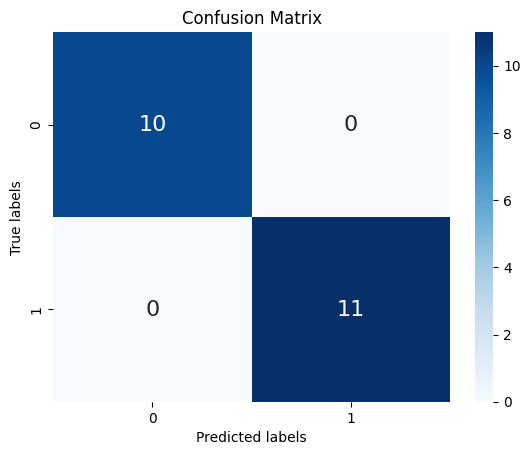

In [60]:
conf_matrix = confusion_matrix(y_test_first, y_pred_first, labels=None, sample_weight=None)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [55]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", cm)
print("\nAccuracy:", cm.diagonal().sum() / cm.sum())

ValueError: multilabel-indicator is not supported

In [63]:

# Define the neural network model
def create_model(optimizer='adam', loss='binary_crossentropy'):
    model = Sequential()
    model.add(Dense(56, input_dim=13, activation='relu'))
    model.add(Dense(112, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model


# Define the hyperparameter grid
param_grid = {'batch_size': [10, 20],
              'epochs': [100, 150, 200],
              'optimizer': ['adam', 'rmsprop'],
              'loss': ['binary_crossentropy','categorical_crossentropy', 'hinge']}


# Initialize the best accuracy and the best hyperparameters
best_accuracy = 0
best_params = {}

# Loop over the hyperparameter grid
for params in itertools.product(*param_grid.values()):
    # Create the neural network model with the current hyperparameters
    model = create_model(params[2], params[3])

    # Train the model
    model.fit(X_train, y_train, batch_size=params[0], epochs=params[1], verbose=0)

    # Evaluate the model on the testing set
    y_pred = model.predict_classes(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Update the best accuracy and the best hyperparameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

# Print the best hyperparameters
print("Best hyperparameters: ", best_params)
print("Best accuracy: ", best_accuracy)

NameError: name 'itertools' is not defined